In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob

In [27]:
src_file = 'train_data/normal/2/chapter1.wav'
fs, data = wavfile.read(src_file)
data = np.array(data)
# sampling frequency = 44100
print(fs, data)

44100 [[   0    0]
 [   0    0]
 [   0    0]
 ...
 [-265   10]
 [-229    8]
 [-222    8]]


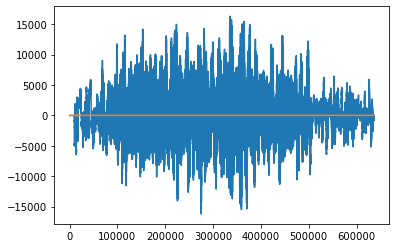

In [28]:
plt.plot(data)

In [29]:
import librosa
import librosa.display


Text(0.5, 1.0, 'Waveform')

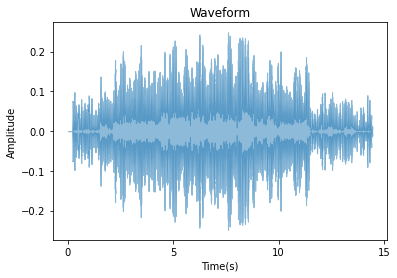

In [30]:
# Waveform plot
sig, sr = librosa.load(src_file)
plt.figure()
librosa.display.waveshow(sig, alpha=0.5)
plt.xlabel('Time(s)')
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power spectrum')

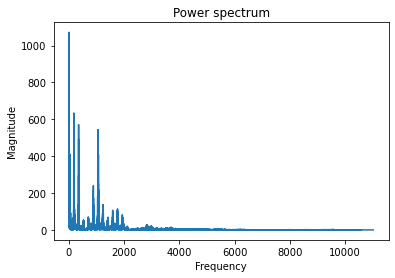

In [6]:
# Fourier transform plot
fft = np.fft.fft(sig)

magnitude = np.abs(fft)

f = np.linspace(0, sr, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram (dB)')

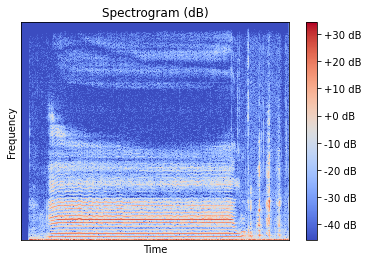

In [7]:
# Spectrogram plot

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [18]:
import opensmile

smile = opensmile.Smile(
    feature_set = opensmile.FeatureSet.ComParE_2016,
    feature_level = opensmile.FeatureLevel.Functionals
)
y = smile.process_file(src_file)
print(y.shape)
y = np.array(y)

(1, 6373)


In [20]:
print(y[0:10])

[[4.3050022e+00 9.3492061e-01 9.5238099e-03 ... 3.7318604e+01
  7.6563271e+01 4.2869171e+01]]
